# **Data Visualization Assignment-1**
*Assignment By Saideva Sathvik.R, IMSc., 22234*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset - 1
## *accidents_2017.csv*

# **Loading Dataset**

In [2]:
df = pd.read_csv('accidents_2017.csv')

In [3]:
df.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360886
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [4]:
df["Month"].value_counts()

November     991
May          963
March        935
October      928
July         918
June         908
April        845
January      844
February     824
September    769
December     762
August       652
Name: Month, dtype: int64

In [5]:
df[["Month","Victims"]]

,Month,Victims
0,October,2
1,September,2
2,December,5
3,July,1
4,May,1
...,...,...
10334,April,1
10335,March,1
10336,December,1
10337,July,1


In [6]:
table = pd.pivot_table( data=df, index='Month', values='Victims', aggfunc=np.sum)
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

table = table.reindex(new_order, axis=0) 
table

,Victims
Month,
January,991
February,942
March,1087
April,936
May,1092
June,1087
July,1103
August,803
September,958


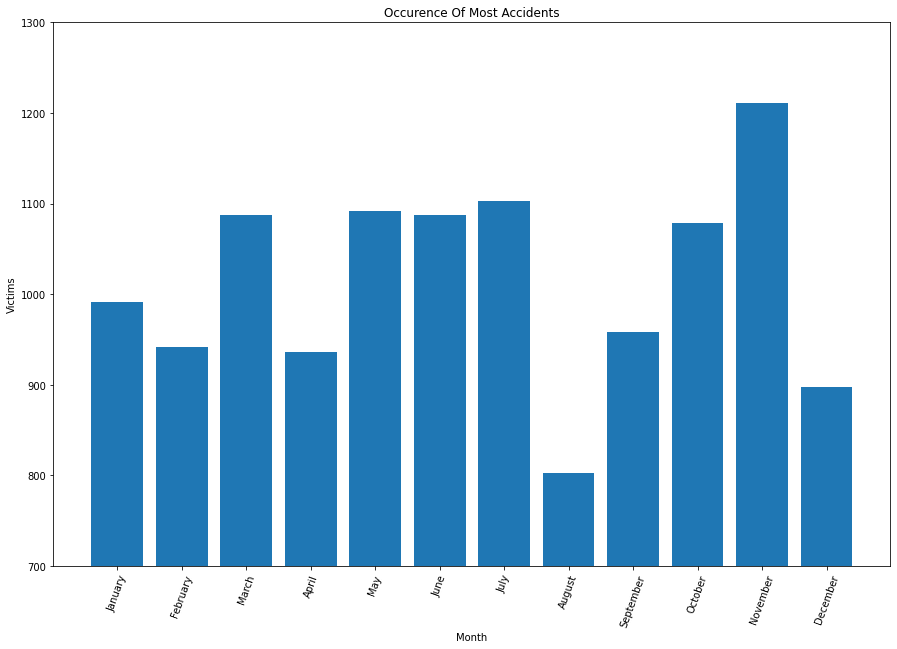

In [7]:
plt.figure(figsize=(15,10))
plt.bar(table.index, table['Victims'])
plt.title("Occurence Of Most Accidents")
plt.xticks(rotation=70)
plt.ylim(700,1300)
plt.xlabel("Month")
plt.ylabel("Victims")
#plt.savefig("MvsV.png", dpi=300)
plt.show()

In [8]:
table_pie = table
total = df['Victims'].sum()
table_pie['Victims'] = table_pie['Victims']/total
table_pie

,Victims
Month,
January,0.081323
February,0.077302
March,0.089201
April,0.076809
May,0.089611
June,0.089201
July,0.090514
August,0.065895
September,0.078615


In [9]:
table_pie['Victims'].sum()

1.0

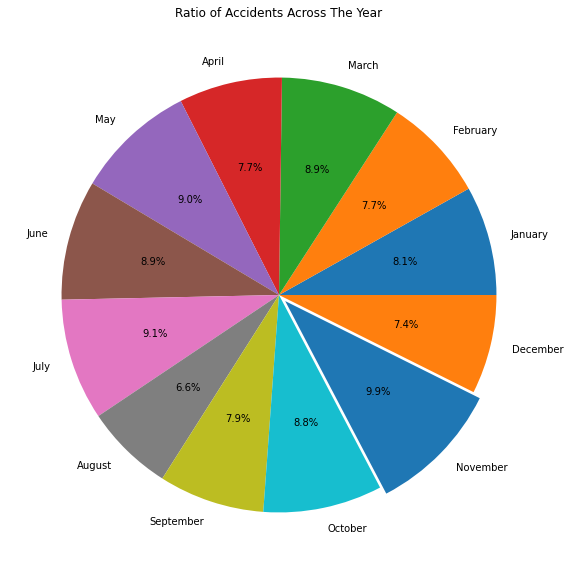

In [26]:
plt.figure(figsize=(10,10))
plt.pie(x=table_pie['Victims'], labels=table_pie.index, autopct= '%1.1f%%', explode=[0,0,0,0,0,0,0,0,0,0,0.04,0])
plt.title("Ratio of Accidents Across The Year")
#plt.savefig('ROA', dpi=300)
plt.show()

In [27]:
month_Specific = df[(df["Month"] == "November")]
month_Specific

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
17,2017S009296,Sant Martí,el Camp de l'Arpa del Clot,Indústria ...,Thursday,November,9,22,Night,1,0,1,1,2.176740,41.411445
25,2017S009722,Sant Martí,el Camp de l'Arpa del Clot,Mallorca ...,Wednesday,November,22,20,Afternoon,1,0,1,2,2.181955,41.408529
36,2017S009302,Sant Martí,el Clot,Meridiana ...,Friday,November,10,11,Morning,1,0,1,1,2.187185,41.408131
52,2017S009772,Sant Martí,el Camp de l'Arpa del Clot,Meridiana / València ...,Friday,November,24,8,Morning,2,0,2,3,2.186877,41.410354
101,2017S009684,Sant Martí,Provençals del Poblenou,Josep Pla / Perú ...,Tuesday,November,21,22,Night,1,0,1,2,2.206224,41.416095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10281,2017S009471,Sant Andreu,Sant Andreu,Torras i Bages ...,Wednesday,November,15,15,Afternoon,1,0,1,2,2.191275,41.438336
10290,2017S009220,Sant Andreu,Navas,Espronceda / Josep Estivill ...,Wednesday,November,8,8,Morning,2,0,2,1,2.187894,41.417940
10298,2017S009619,Sant Andreu,Sant Andreu,Arquímedes / Gran de Sant Andreu ...,Sunday,November,19,20,Afternoon,1,0,1,1,2.188260,41.441278
10302,2017S009943,Sant Andreu,Sant Andreu,Bartrina / Campeny ...,Wednesday,November,29,11,Morning,0,1,1,1,2.186695,41.440430


In [48]:
month_Specific_morning = month_Specific[(month_Specific["Part of the day"] == "Morning")]
ym = month_Specific_morning['Victims'].sum()

month_Specific_afn = month_Specific[(month_Specific["Part of the day"] == "Afternoon")]
ya = month_Specific_afn['Victims'].sum()

month_Specific_night = month_Specific[(month_Specific["Part of the day"] == "Night")]
yn = month_Specific_night['Victims'].sum()



data = [['Morning', ym], ['Afternoon', ya], ['Night', yn]]

df_new = pd.DataFrame(data, columns=['Part of the day', 'Victims'])
df_new
#df_new['Victims'].sum() - check


,Part of the day,Victims
0,Morning,455
1,Afternoon,654
2,Night,102


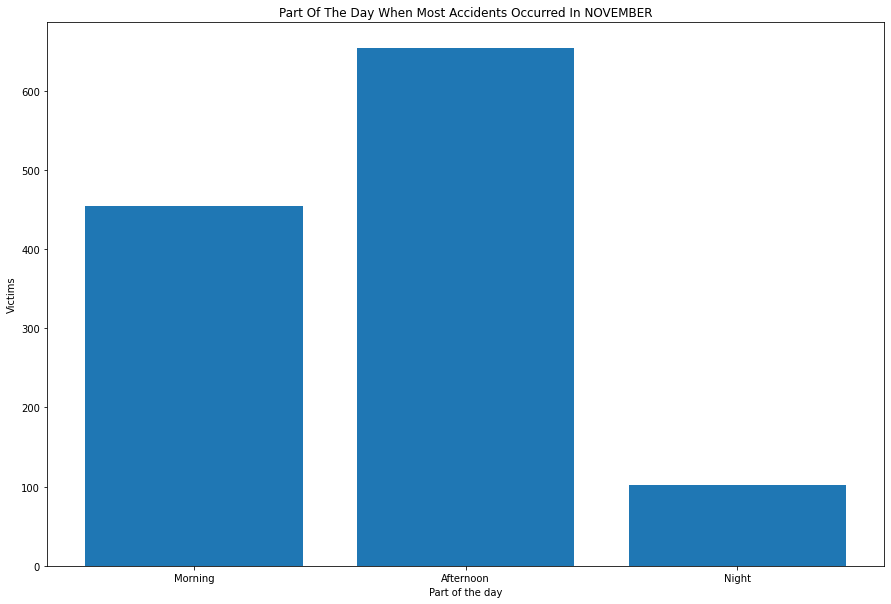

In [52]:
plt.figure(figsize=(15,10))
plt.bar(df_new['Part of the day'], df_new['Victims'])
plt.title("Part Of The Day When Most Accidents Occurred In NOVEMBER")


plt.xlabel("Part of the day")
plt.ylabel("Victims")

plt.show()

In [53]:
table_pie2 = df_new
total = df_new['Victims'].sum()
table_pie2['Victims'] = table_pie2['Victims']/total
table_pie2

,Part of the day,Victims
0,Morning,0.375723
1,Afternoon,0.540050
2,Night,0.084228


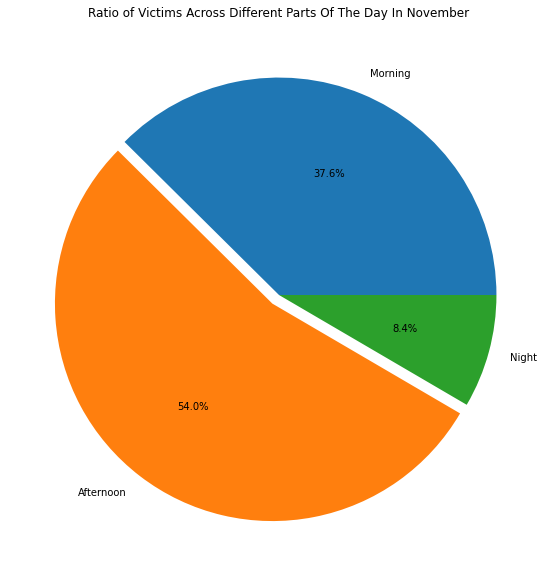

In [57]:
plt.figure(figsize=(10,10))
plt.pie(x=table_pie2['Victims'], labels=table_pie2['Part of the day'], autopct= '%1.1f%%',explode=[0,0.05,0])
plt.title("Ratio of Victims Across Different Parts Of The Day In November")

plt.show()

## Inferences Drawn :
### ***1. More Number Of Accidents Occured In November***
### ***2. More Number Of Accidents Occured During Afternoon in November***

# Dataset - 2
## *births.csv*

In [11]:
df1 = pd.read_csv('births.csv')

In [12]:
df1.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Number
0,2017,1,Ciutat Vella,1,el Raval,Boys,283
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Boys,56
2,2017,1,Ciutat Vella,3,la Barceloneta,Boys,51
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Boys,90
4,2017,2,Eixample,5,el Fort Pienc,Boys,117


In [13]:
table2 = pd.pivot_table( data=df1, index='District Name', values='Number', aggfunc=np.sum)
table2

,Number
District Name,
Ciutat Vella,4073
Eixample,10357
Gràcia,5263
Horta-Guinardó,6675
Les Corts,3127
No consta,11
Nou Barris,7062
Sant Andreu,6423
Sant Martí,10368


## Bar Plot 2

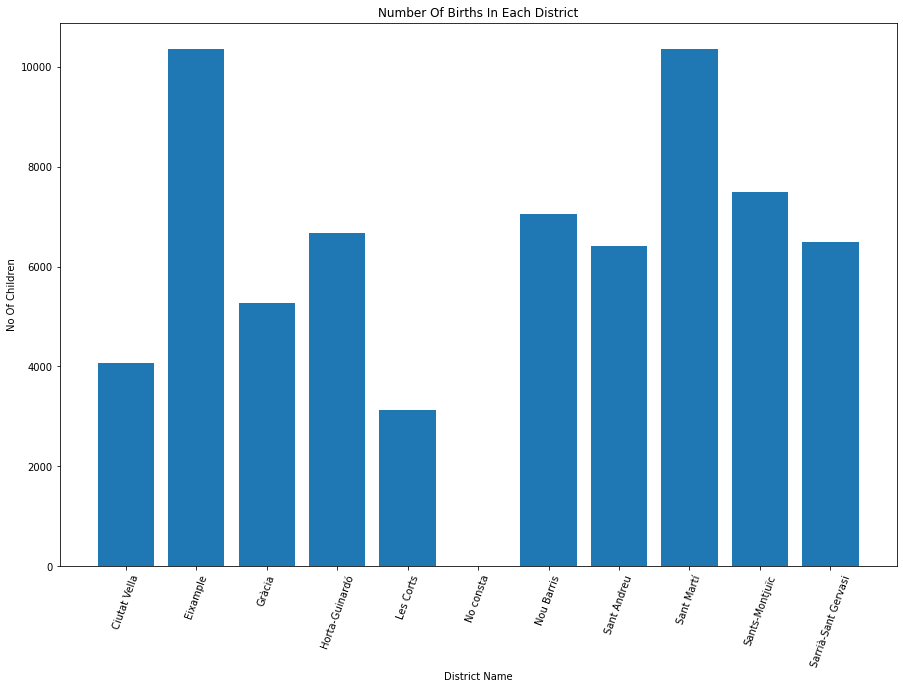

In [14]:
plt.figure(figsize=(15,10))
plt.bar(table2.index, table2['Number'])
plt.title("Number Of Births In Each District")
plt.xticks(rotation=70)
plt.xlabel("District Name")
plt.ylabel("No Of Children")

#plt.savefig("MvsV.png", dpi=300)
plt.show()

## Pie Chart 2

In [15]:
dist_specific_boys = df1[(df1["District Name"] == "Eixample") & (df1["Gender"] == "Boys")]
dist_specific_boys

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Number
4,2017,2,Eixample,5,el Fort Pienc,Boys,117
5,2017,2,Eixample,6,la Sagrada Família,Boys,207
6,2017,2,Eixample,7,la Dreta de l'Eixample,Boys,185
7,2017,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Boys,176
8,2017,2,Eixample,9,la Nova Esquerra de l'Eixample,Boys,218
9,2017,2,Eixample,10,Sant Antoni,Boys,172
150,2016,2,Eixample,5,el Fort Pienc,Boys,132
151,2016,2,Eixample,6,la Sagrada Família,Boys,192
152,2016,2,Eixample,7,la Dreta de l'Eixample,Boys,177
153,2016,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Boys,159


In [16]:
table3 = pd.pivot_table( data=dist_specific_boys, index='Neighborhood Name', values='Number', aggfunc=np.sum)
table3

,Number
Neighborhood Name,
Sant Antoni,778
el Fort Pienc,650
l'Antiga Esquerra de l'Eixample,846
la Dreta de l'Eixample,957
la Nova Esquerra de l'Eixample,1093
la Sagrada Família,983


In [17]:
total = table3['Number'].sum()
table3['Number'] = table3['Number']/total
table3

,Number
Neighborhood Name,
Sant Antoni,0.146599
el Fort Pienc,0.122480
l'Antiga Esquerra de l'Eixample,0.159412
la Dreta de l'Eixample,0.180328
la Nova Esquerra de l'Eixample,0.205954
la Sagrada Família,0.185227


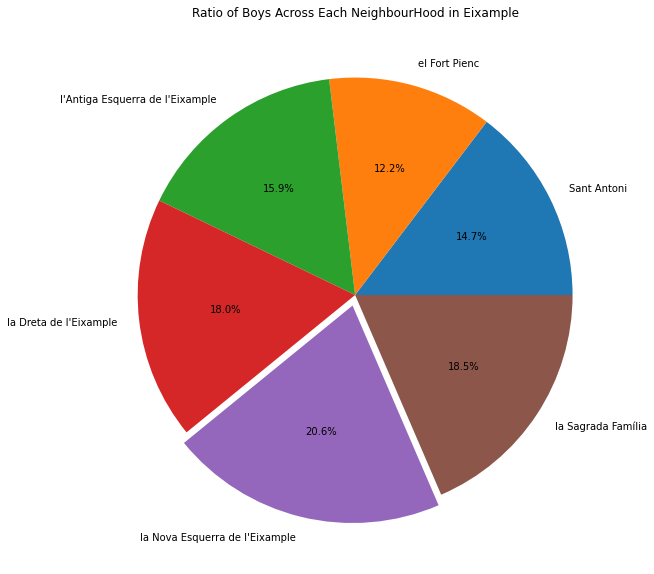

In [18]:
plt.figure(figsize=(10,10))
plt.pie(x=table3['Number'], labels=table3.index, autopct= '%1.1f%%', explode=[0,0,0,0,0.05,0])
plt.title("Ratio of Boys Across Each NeighbourHood in Eixample")

plt.show()

In [19]:
dist_specific_girls = df1[(df1["District Name"] == "Eixample") & (df1["Gender"] == "Girls")]
dist_specific_girls

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Number
77,2017,2,Eixample,5,el Fort Pienc,Girls,114
78,2017,2,Eixample,6,la Sagrada Família,Girls,183
79,2017,2,Eixample,7,la Dreta de l'Eixample,Girls,159
80,2017,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Girls,164
81,2017,2,Eixample,9,la Nova Esquerra de l'Eixample,Girls,242
82,2017,2,Eixample,10,Sant Antoni,Girls,130
224,2016,2,Eixample,5,el Fort Pienc,Girls,123
225,2016,2,Eixample,6,la Sagrada Família,Girls,208
226,2016,2,Eixample,7,la Dreta de l'Eixample,Girls,187
227,2016,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Girls,165


In [20]:
table4 = pd.pivot_table( data=dist_specific_girls, index='Neighborhood Name', values='Number', aggfunc=np.sum)
table4

,Number
Neighborhood Name,
Sant Antoni,717
el Fort Pienc,588
l'Antiga Esquerra de l'Eixample,813
la Dreta de l'Eixample,867
la Nova Esquerra de l'Eixample,1089
la Sagrada Família,976


In [21]:
total = table4['Number'].sum()
table4['Number'] = table4['Number']/total
table4

,Number
Neighborhood Name,
Sant Antoni,0.141980
el Fort Pienc,0.116436
l'Antiga Esquerra de l'Eixample,0.160990
la Dreta de l'Eixample,0.171683
la Nova Esquerra de l'Eixample,0.215644
la Sagrada Família,0.193267


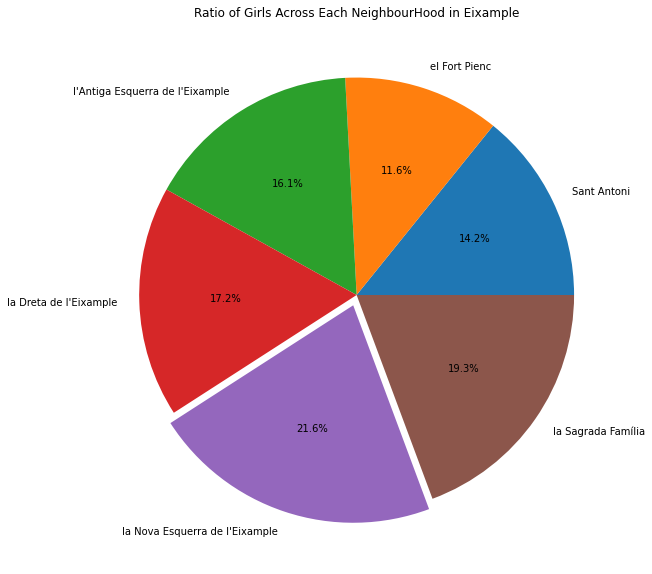

In [22]:
plt.figure(figsize=(10,10))
plt.pie(x=table4['Number'], labels=table4.index, autopct= '%1.1f%%', explode=[0,0,0,0,0.05,0])
plt.title("Ratio of Girls Across Each NeighbourHood in Eixample")

plt.show()

## Inferences Drawn :
### ***1. Sant Marti Recorded The Highest Number of Births***
### ***2. la Nova Esquerra de l'Eixample has the highest number of boys in Eixample***
### ***3. la Nova Esquerra de l'Eixample also has the highest number of girls in Eixample***